# Support vector machine model using text data vectorized with word2vec

In [32]:
#import packages

import numpy as np

import pandas as pd 

from sklearn.model_selection import KFold, cross_validate

from sklearn.pipeline import Pipeline

from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay, make_scorer, classification_report

import matplotlib as plt

from time import process_time

In [33]:
#import data

%store -r x_text_train_wv_2d
%store -r x_text_test_wv_2d
%store -r y_text_train_wv
%store -r y_text_test_wv

In [34]:
#rename variables for ease of use

x_train =  x_text_train_wv_2d
x_test =  x_text_test_wv_2d
y_train = y_text_train_wv
y_test = y_text_test_wv

In [35]:
#define model

svm = SVC()

In [39]:
#define scoring metrics for cross validation

scorer = {'accuracy': make_scorer(accuracy_score),
          'precision': make_scorer(precision_score),
          'recall': make_scorer(recall_score),
          'f1_score' : make_scorer(f1_score)
          }

In [40]:
#define KFold

k_folds = KFold(n_splits = 5, random_state=42, shuffle=True)

In [41]:
#cross validate on training set to check model stability

cv_scores_w2v_text_svm = cross_validate(svm, x_train, y_train, cv = k_folds, scoring=scorer)

In [42]:
#check cross validation scores

cv_scores_w2v_text_svm

{'fit_time': array([149.75869131, 135.54414344, 142.20204091, 126.98821592,
        131.58633471]),
 'score_time': array([33.59315777, 33.85567999, 33.41067743, 30.4688623 , 26.6384449 ]),
 'test_accuracy': array([0.90119541, 0.90583069, 0.89874344, 0.89044772, 0.88934976]),
 'test_precision': array([0.89470768, 0.89424142, 0.88613179, 0.87615176, 0.86692015]),
 'test_recall': array([0.88248155, 0.89226519, 0.8851556 , 0.87996734, 0.88445553]),
 'test_f1_score': array([0.88855256, 0.89325221, 0.88564343, 0.8780554 , 0.87560005])}

In [43]:
#fit model on the whole training set
start = process_time()

svm.fit(x_train, y_train)

end=process_time()

In [44]:
#test model on test set

y_pred = svm.predict(x_test)

In [45]:
#view classification report

print(classification_report(y_pred, y_test))

              precision    recall  f1-score   support

           0       0.90      0.91      0.90      9693
           1       0.89      0.88      0.88      7874

    accuracy                           0.89     17567
   macro avg       0.89      0.89      0.89     17567
weighted avg       0.89      0.89      0.89     17567



In [46]:
#view confusion matrix

conf_matrix=confusion_matrix(y_test, y_pred)


[Text(0.5, 1.0, 'SVM model with Text Data (word2vec)'),
 Text(0.5, 0, 'Predicted'),
 Text(0, 0.5, 'Actual')]

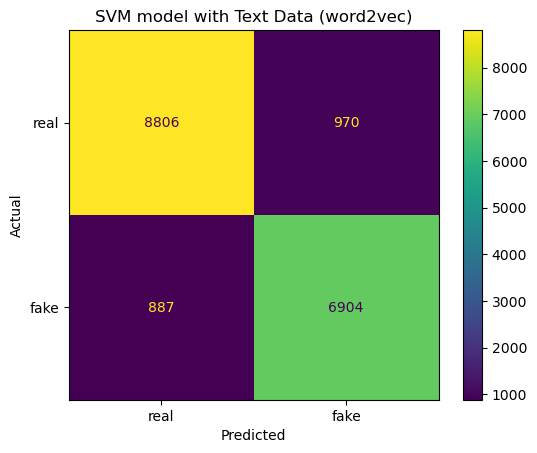

In [47]:
cm_plot = ConfusionMatrixDisplay(conf_matrix, display_labels = ['real', 'fake'])
cm_plot.plot(values_format='')
cm_plot.ax_.set(
                title='SVM model with Text Data (word2vec)', 
                xlabel='Predicted', 
                ylabel='Actual')

In [48]:
accuracy=accuracy_score(y_test, y_pred)
precision=precision_score(y_test, y_pred)
recall=recall_score(y_test, y_pred)
f1=f1_score(y_test, y_pred)
fit_time=end-start

In [49]:
dict = {'data type': 'text',
        'model type':'SVM',
        'vectorize type':'word2vec',
        'accuracy': accuracy,
        'precision': precision,
        'recall': recall,
        'f1': f1,
        'fit time': fit_time
       }

In [50]:
w2v_text_SVM=pd.DataFrame.from_dict([dict])

In [51]:
w2v_text_SVM

,data type,model type,vectorize type,accuracy,precision,recall,f1,fit time
0,text,SVM,word2vec,0.89429,0.87681,0.886151,0.881455,188.765625


In [52]:
#save results for later use

%store w2v_text_SVM

Stored 'w2v_text_SVM' (DataFrame)
